In [92]:
import pandas as pd
import numpy as np
import pystan
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from stancode import code

In [57]:
df = pd.read_csv('../data/cleaned.csv')
df['time'] = pd.to_datetime(df['time'])
df

,time,y,logy,logy_cycle,logy_trend
0,1992-02-01,5.307551e+09,22.392396,0.089542,22.302854
1,1992-03-01,4.468763e+09,22.220378,-0.083939,22.304317
2,1992-04-01,4.861495e+09,22.304612,-0.001168,22.305780
3,1992-05-01,4.803284e+09,22.292566,-0.014678,22.307244
4,1992-06-01,4.693274e+09,22.269396,-0.039312,22.308709
...,...,...,...,...,...
324,2019-02-01,7.129981e+09,22.687574,-0.009445,22.697020
325,2019-03-01,6.791405e+09,22.638924,-0.055702,22.694626
326,2019-04-01,6.958646e+09,22.663251,-0.028979,22.692230
327,2019-05-01,7.006597e+09,22.670118,-0.019716,22.689834


In [58]:
datain = {
    'N':len(df), 
    'y':df.logy_cycle
}

In [59]:
code

'\ndata {\n int N; \n real y[N];\n  \n}\nparameters {\n  real<lower=0, upper=1> rho_y;\n  real<lower=0, upper=1> rho_sigma;\n  real sigma_bar;\n  real<lower=0> sigma_nu;\n  \n  real sigma[N];\n}\nmodel {\n  rho_y ~ beta(.5, .2);\n  rho_sigma ~ beta(.5, .2);\n  sigma_bar ~ normal(-4, 1);\n  sigma_nu ~ gamma(1, 2);\n  sigma[1] ~ normal( sigma_bar, sigma_nu / sqrt( 1 - (rho_sigma * rho_sigma)));\n  for (t in 2:N) \n    y[t] ~ normal(rho_y * y[t-1] , exp(sigma[t]));\n  for (t in 2:N) \n    sigma[t] ~ normal((1 - rho_sigma) * sigma_bar + rho_sigma * sigma[t-1] , sigma_nu);\n}\n'

In [60]:
code = """
data {
 int N; 
 real y[N];
  
}
parameters {
  real<lower=0, upper=1> rho_y;
  real<lower=0, upper=1> rho_sigma;
  real sigma_bar;
  real<lower=0> sigma_nu;
  
  real sigma[N];
}
model {
  rho_y ~ beta(.5, .2);
  rho_sigma ~ beta(.5, .2);
  sigma_bar ~ normal(-4, 1);
  sigma_nu ~ gamma(1, 2);
  sigma[1] ~ normal( sigma_bar, sigma_nu / sqrt( 1 - (rho_sigma * rho_sigma)));
  for (t in 2:N) 
    y[t] ~ normal(rho_y * y[t-1] , exp(sigma[t]));
  for (t in 2:N) 
    sigma[t] ~ normal((1 - rho_sigma) * sigma_bar + rho_sigma * sigma[t-1] , sigma_nu);
}
"""

In [61]:
sm = pystan.StanModel(model_code=code)

In file included from /var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/pystan_87vlfpeg/stanfit4anon_model_f2f366a3cb86e35f17e7a07aebe8406c_5594811851922062723.cpp:1280:
In file included from /Users/mitch/envs/main/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /Users/mitch/envs/main/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/mitch/envs/main/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929:
/Users/mitch/envs/main/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
In file included from /var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/pystan_87vlfpeg/stanfit4anon_model_f2f366a3cb86e35f17e7a07aebe8406c_5594811851922062723.cpp:1286:
In file inc

In [62]:
fit = sm.sampling(datain, iter=1000, chains=1, seed=1)

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 20)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.




Gradient evaluation took 8.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.89 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 1.38964 seconds (Warm-up)
               2.94004 seconds (Sampling)
               4.32968 seconds (Total)



In [63]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_f2f366a3cb86e35f17e7a07aebe8406c.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
rho_y       0.72  1.9e-3   0.04   0.63   0.69   0.72   0.74   0.79    480   1.01
rho_sigma   0.98    0.01   0.05   0.84   0.97   0.99    1.0    1.0     20   1.12
sigma_bar  -3.39    0.05   0.44  -4.63  -3.53  -3.33  -3.18  -2.64     67   1.01
sigma_nu    0.05    0.01   0.02   0.03   0.04   0.05   0.06   0.11      4   1.31
sigma[1]    -2.9  9.4e-3   0.17  -3.23  -3.02   -2.9  -2.79  -2.52    348    1.0
sigma[2]   -2.89  9.1e-3   0.17   -3.2   -3.0  -2.89  -2.78  -2.57    330    1.0
sigma[3]    -2.9  8.7e-3   0.17  -3.23  -3.01  -2.91   -2.8  -2.57    371    1.0
sigma[4]   -2.91  8.4e-3   0.17  -3.24  -3.03  -2.91   -2.8  -2.57    393    1.0
sigma[5]   -2.92  9.0e-3   0.17  -3.25  -3.03

In [64]:
posterior = fit.to_dataframe()
posterior

,chain,draw,warmup,rho_y,rho_sigma,sigma_bar,sigma_nu,sigma[1],sigma[2],sigma[3],...,sigma[327],sigma[328],sigma[329],lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__
0,0,0,0,0.702318,0.890144,-3.259684,0.109612,-3.049423,-2.965349,-3.095826,...,-3.763323,-3.770944,-3.724480,1515.270320,0.893297,0.074819,7.0,127.0,0.0,-1353.457985
1,0,1,0,0.693888,0.930949,-3.183107,0.110594,-3.061719,-2.999166,-2.973308,...,-3.307214,-3.309427,-3.229403,1509.180930,0.948598,0.074819,7.0,127.0,0.0,-1350.360036
2,0,2,0,0.720644,0.936748,-3.227021,0.095029,-2.991953,-2.966715,-2.917852,...,-3.177583,-3.095025,-3.016968,1540.138672,0.987146,0.074819,7.0,127.0,0.0,-1355.509454
3,0,3,0,0.692344,0.929054,-3.258720,0.092250,-2.835142,-2.951361,-2.981629,...,-3.738805,-3.799535,-3.859699,1535.252526,0.936943,0.074819,7.0,127.0,0.0,-1382.507288
4,0,4,0,0.680924,0.920408,-3.349715,0.094261,-2.877866,-2.862645,-2.719901,...,-3.110490,-3.232979,-3.173525,1531.670849,0.878551,0.074819,7.0,127.0,0.0,-1370.956975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,495,0,0.717349,0.989548,-3.494917,0.067898,-2.739468,-2.623147,-2.633216,...,-3.621806,-3.564965,-3.469353,1666.321802,0.713384,0.074819,7.0,127.0,0.0,-1497.031183
496,0,496,0,0.748675,0.977872,-3.511794,0.061268,-2.679084,-2.722859,-2.751478,...,-3.464014,-3.538584,-3.595533,1676.466351,0.973101,0.074819,7.0,127.0,0.0,-1518.344518
497,0,497,0,0.716430,0.977889,-3.158301,0.067856,-2.881847,-2.859318,-2.797380,...,-3.637548,-3.602146,-3.519637,1667.370208,0.411296,0.074819,7.0,127.0,0.0,-1490.814595
498,0,498,0,0.755514,0.991402,-3.553184,0.061945,-2.850831,-2.919911,-2.884930,...,-3.709465,-3.830535,-3.755585,1664.846472,0.836275,0.074819,7.0,127.0,0.0,-1507.491140


In [65]:
params = posterior[['rho_y', 'rho_sigma', 'sigma_bar', 'sigma_nu']]

In [90]:
params

,rho_y,rho_sigma,sigma_bar,sigma_nu
0,0.702318,0.890144,-3.259684,0.109612
1,0.693888,0.930949,-3.183107,0.110594
2,0.720644,0.936748,-3.227021,0.095029
3,0.692344,0.929054,-3.258720,0.092250
4,0.680924,0.920408,-3.349715,0.094261
...,...,...,...,...
495,0.717349,0.989548,-3.494917,0.067898
496,0.748675,0.977872,-3.511794,0.061268
497,0.716430,0.977889,-3.158301,0.067856
498,0.755514,0.991402,-3.553184,0.061945


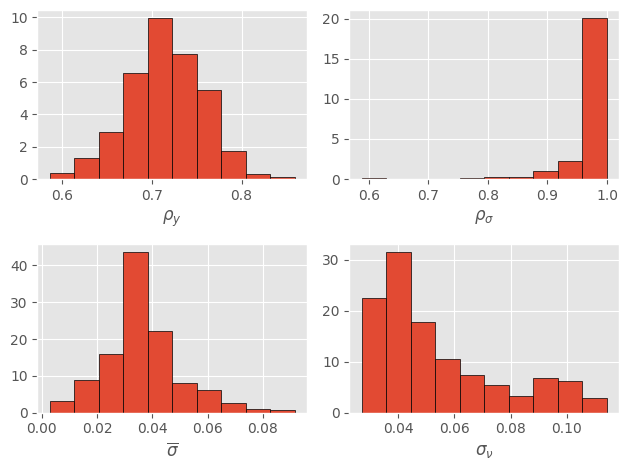

In [122]:
plt.subplot(221)
plt.hist(params['rho_y'], edgecolor='black', density=True)
plt.xlabel(r'$\rho_y$')

plt.subplot(222)
plt.hist(params['rho_sigma'], edgecolor='black', density=True)
plt.xlabel(r'$\rho_\sigma$')

plt.subplot(223)
plt.hist(np.exp(params['sigma_bar']), edgecolor='black', density=True)
plt.xlabel(r'$\overline{\sigma}$')

plt.subplot(224)
plt.hist(params['sigma_nu'], edgecolor='black', density=True)
plt.xlabel(r'$\sigma_\nu$')

plt.tight_layout()

In [82]:
focus = [x for x in posterior.columns if '[' in x]
sigma = posterior[focus].transform(np.exp)
sigma

,sigma[1],sigma[2],sigma[3],sigma[4],sigma[5],sigma[6],sigma[7],sigma[8],sigma[9],sigma[10],...,sigma[320],sigma[321],sigma[322],sigma[323],sigma[324],sigma[325],sigma[326],sigma[327],sigma[328],sigma[329]
0,0.047386,0.051542,0.045238,0.051662,0.045978,0.049227,0.046081,0.039391,0.039576,0.040416,...,0.029423,0.028591,0.031894,0.031640,0.030142,0.030209,0.026288,0.023206,0.023030,0.024126
1,0.046807,0.049829,0.051134,0.050446,0.056514,0.055801,0.057167,0.058255,0.049657,0.054455,...,0.030311,0.034166,0.042466,0.045216,0.044226,0.044004,0.041376,0.036618,0.036537,0.039581
2,0.050189,0.051472,0.054050,0.057178,0.057719,0.061163,0.058677,0.053907,0.065060,0.064060,...,0.032563,0.034690,0.039487,0.045077,0.046783,0.040179,0.038377,0.041686,0.045274,0.048949
3,0.058710,0.052269,0.050710,0.061522,0.054811,0.051372,0.057550,0.057026,0.054527,0.061213,...,0.028808,0.024368,0.024973,0.025128,0.023936,0.022530,0.024180,0.023782,0.022381,0.021074
4,0.056255,0.057117,0.065881,0.072214,0.059636,0.070840,0.063184,0.063576,0.069322,0.056828,...,0.039555,0.045278,0.041105,0.042495,0.042660,0.041433,0.044434,0.044579,0.039440,0.041856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.064605,0.072574,0.071847,0.068045,0.063512,0.064447,0.072514,0.068548,0.063175,0.066676,...,0.025121,0.026803,0.028223,0.028641,0.026653,0.025443,0.027420,0.026734,0.028298,0.031137
496,0.068626,0.065687,0.063833,0.060707,0.056478,0.059004,0.052913,0.051563,0.051764,0.052141,...,0.037971,0.034687,0.031866,0.034115,0.029447,0.028481,0.030199,0.031304,0.029054,0.027446
497,0.056031,0.057308,0.060970,0.063289,0.055237,0.053813,0.051672,0.050545,0.045725,0.040555,...,0.027425,0.029551,0.031069,0.033527,0.030646,0.030747,0.028038,0.026317,0.027265,0.029610
498,0.057796,0.053938,0.055859,0.057508,0.056305,0.051984,0.050930,0.053524,0.055010,0.059526,...,0.024728,0.025244,0.024864,0.026375,0.023861,0.024910,0.023923,0.024491,0.021698,0.023387


In [83]:
q20 = np.quantile(sigma, 0.20, axis=0)
q80 = np.quantile(sigma, 0.80, axis=0)
qmean = np.mean(sigma.values, axis=0)

In [84]:
sigma_ts = pd.DataFrame({'time':df.time})
sigma_ts['qmean'] = qmean
sigma_ts['q20'] = q20
sigma_ts['q80'] = q80
sigma_ts

,time,qmean,q20,q80
0,1992-02-01,0.056023,0.047753,0.062687
1,1992-03-01,0.056500,0.048354,0.063508
2,1992-04-01,0.055725,0.047798,0.062623
3,1992-05-01,0.055149,0.047197,0.062366
4,1992-06-01,0.054507,0.047058,0.061624
...,...,...,...,...
324,2019-02-01,0.030681,0.026451,0.034333
325,2019-03-01,0.030602,0.026588,0.034318
326,2019-04-01,0.030486,0.026136,0.034492
327,2019-05-01,0.030464,0.025713,0.034522


In [85]:
import matplotlib.dates as mdates

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_98873/2639216997.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_98873/2639216997.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)


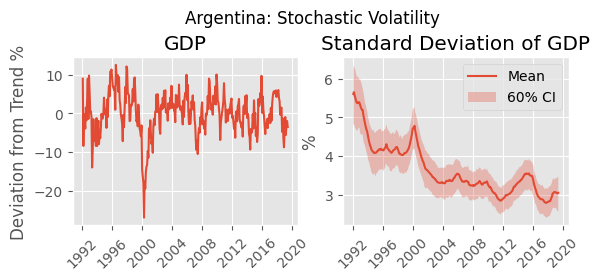

In [124]:
fig = plt.figure()

fig.suptitle('Argentina: Stochastic Volatility')

ax = plt.subplot(221)
ax.plot(df.time, 100*df.logy_cycle)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Deviation from Trend %')
ax.set_title('GDP')

ax = plt.subplot(222)
ax.plot(sigma_ts.time, 100*sigma_ts.qmean, label='Mean')
ax.fill_between(sigma_ts.time, 100*sigma_ts.q20, 100*sigma_ts.q80, alpha=0.3, 
                label='60% CI')
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_title('Standard Deviation of GDP')
ax.set_ylabel('%')
ax.legend()